In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Project-1\ytcleaned.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'pushlish_time', 'Genre'],
      dtype='object')

In [4]:
genre_dict = df['Genre'].to_dict()

In [34]:
genre_dict

{0: 'People & Blogs',
 1: 'People & Blogs',
 2: 'People & Blogs',
 3: 'People & Blogs',
 4: 'People & Blogs',
 5: 'People & Blogs',
 6: 'People & Blogs',
 7: 'People & Blogs',
 8: 'People & Blogs',
 9: 'People & Blogs',
 10: 'People & Blogs',
 11: 'People & Blogs',
 12: 'People & Blogs',
 13: 'People & Blogs',
 14: 'People & Blogs',
 15: 'People & Blogs',
 16: 'People & Blogs',
 17: 'People & Blogs',
 18: 'People & Blogs',
 19: 'People & Blogs',
 20: 'People & Blogs',
 21: 'People & Blogs',
 22: 'People & Blogs',
 23: 'People & Blogs',
 24: 'People & Blogs',
 25: 'People & Blogs',
 26: 'People & Blogs',
 27: 'People & Blogs',
 28: 'People & Blogs',
 29: 'People & Blogs',
 30: 'People & Blogs',
 31: 'People & Blogs',
 32: 'People & Blogs',
 33: 'People & Blogs',
 34: 'People & Blogs',
 35: 'People & Blogs',
 36: 'People & Blogs',
 37: 'People & Blogs',
 38: 'People & Blogs',
 39: 'People & Blogs',
 40: 'People & Blogs',
 41: 'People & Blogs',
 42: 'People & Blogs',
 43: 'People & Blogs'

In [5]:
df.describe()

,Unnamed: 0,category_id,views,likes,dislikes,comment_count
count,40949.000000,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,20474.000000,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,11821.102423,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,0.000000,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,10237.000000,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,20474.000000,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,30711.000000,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,40948.000000,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              40949 non-null  int64 
 1   video_id                40949 non-null  object
 2   trending_date           40949 non-null  object
 3   title                   40949 non-null  object
 4   channel_title           40949 non-null  object
 5   category_id             40949 non-null  int64 
 6   publish_time            40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  comments_disabled       40949 non-null  bool  
 12  ratings_disabled        40949 non-null  bool  
 13  video_error_or_removed  40949 non-null  bool  
 14  pushlish_time           40949 non-null  object
 15  Ge

C:\Users\Harry\AppData\Local\Temp\ipykernel_32284\278268683.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


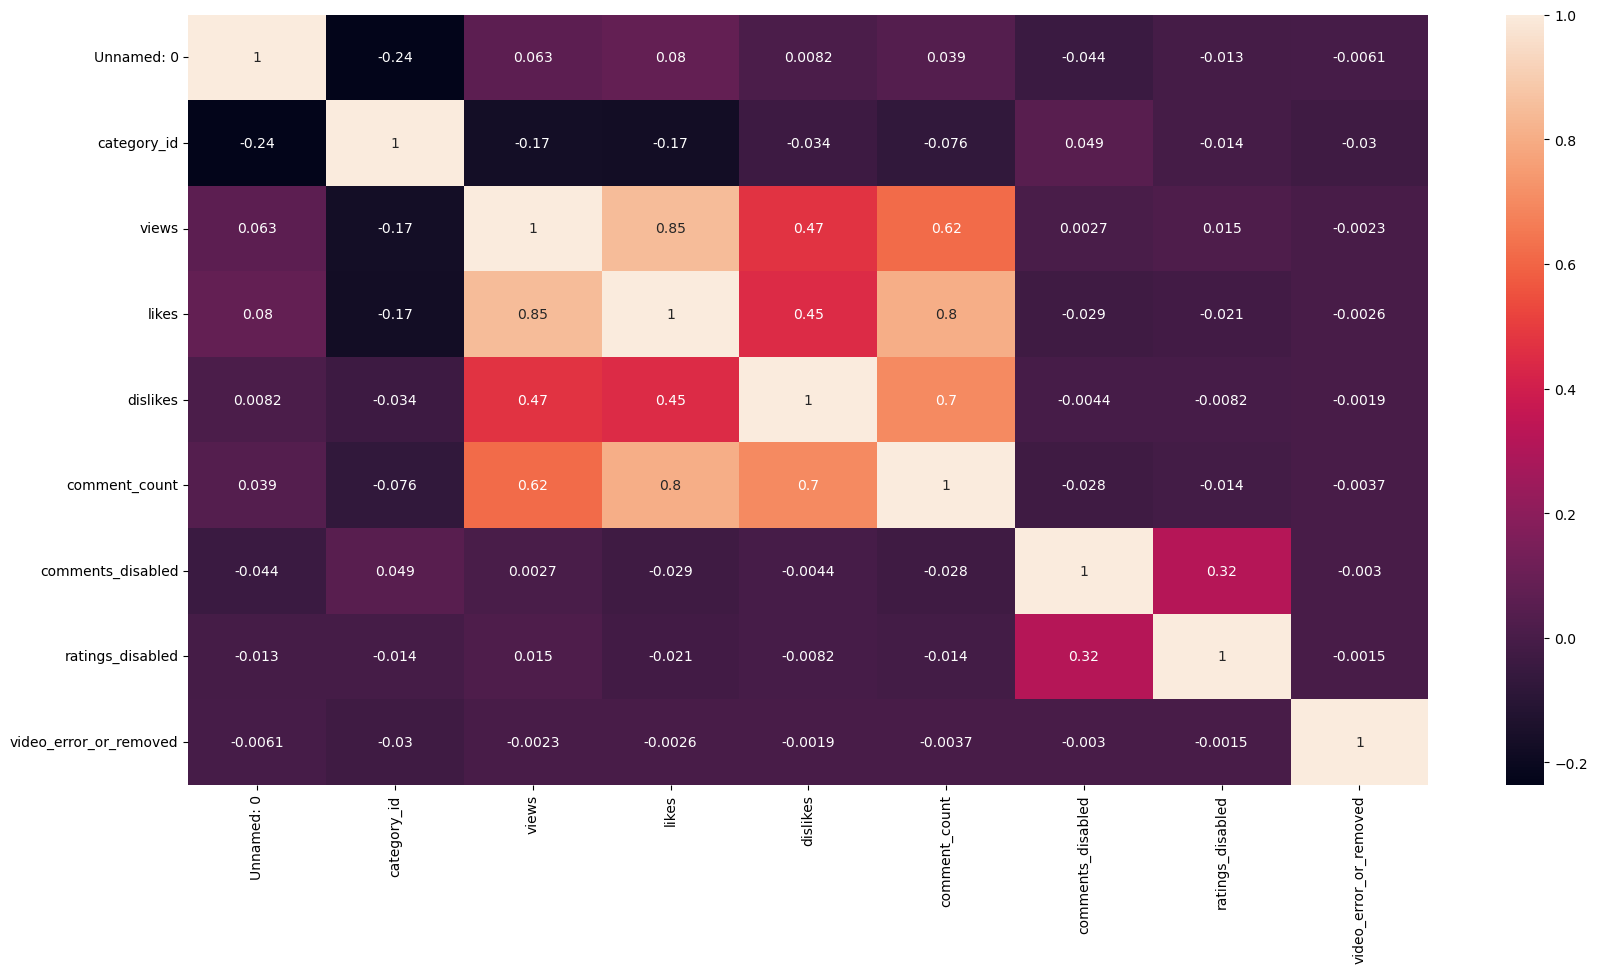

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [11]:
df['Genre'] = lb.fit_transform(df['Genre'])

In [12]:
df['Genre'].unique()

array([10,  3,  1, 12,  4,  8, 14,  7, 11,  2,  6,  0, 15,  5,  9, 13])

In [13]:
y = df['likes']
X = df[['views','dislikes','comment_count','Genre']]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=43)

In [16]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [17]:
linear.fit(X_train,y_train)

LinearRegression()

In [18]:
linear.score(X_test,y_test)

0.8676696188020885

In [21]:
import pickle
with open('model.pickle','wb') as model_file:        
    pickle.dump(linear, model_file)  # dump the model to the file

In [24]:
with open("model.pickle","rb") as model_file:
    model = pickle.load(model_file)

In [25]:
X_test.columns

Index(['views', 'dislikes', 'comment_count', 'Genre'], dtype='object')

In [26]:
model.predict([[698668,4763,345,4]])

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9534.55401468])